# Class 3: Data Analysis with Hungarian Economic Data

### Exercise 1: Obtaining Data from KSH

1. Navigate to [ksh.hu](https://ksh.hu)
2. Go to **Árak** (Prices)
3. Select **Fogyasztói árak** (Consumer Prices)
4. Download the data as a `.csv` file
5. Save the file in the `data/` folder within your project directory


### Questions to Class 1: Inspecting the Data

1. Open the CSV file and examine its structure
2. Notice weird characters like `m�jus` - ask an LLM why (encoding issue)
3. Scroll down to see multiple types of inflation data
4. Inspect the column headers: Élelmiszerek, Szeszes italok/dohányáruk, Ruházkodási cikkek, Tartós fogyasztási cikkek, Háztartási energia/fűtés, Egyéb cikkek/üzemanyagok, Szolgáltatások, Összesen, Nyugdíjas fogyasztói-ár-index
5. Notice the separator. What does CSV stand for?
6. Install RainbowCSV

### Exercise 2: Loading the Data

1. Load the CSV into pandas - fix the encoding issue (ask LLM which encoding to use)
2. Create separate dataframes for each metric type
3. Clean the data structure (headers, skiprows, etc.)


In [1]:
# Your code  here

import pandas as pd

In [18]:
# Load the CSV file with correct encoding and separator
df = pd.read_csv(r'C:/Users/zsombor/vibe coding class/class 3/stadat-ara0040-1.2.1.2-hu.csv', encoding='cp1250', sep=';')
df.head()

,"1.2.1.2. A fogyasztóiár-index fogyasztási főcsoportok szerint, és a nyugdíjas fogyasztóiár-index, havonta",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,
0,Év,Időszak,Élelmiszerek,"Szeszes italok, dohányáruk",Ruházkodási cikkek,Tartós fogyasztási cikkek,"Háztartási energia, fűtés","Egyéb cikkek, üzemanyagok",Szolgáltatások,Összesen,Nyugdíjas fogyasztóiár-index
1,"Az előző év azonos időszaka = 100,0%",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021.,január,"103,9","109,9","97,9","103,1","100,3","99,9","101,7","102,7","102,9"
3,NaN,február,"103,4","109,9","98,4","103,8","100,3","102,7","101,7","103,1","103,2"
4,NaN,március,"102,7","110,3","98,2","103,6","100,3","107,1","101,3","103,7","103,4"


In [19]:
df = df.drop(index=0).reset_index(drop=True)

# Set the new header from the first remaining row, then drop that row
df.columns = [
    'ev', 'idoszak', 'elelmiszerek', 'szeszes_italok_dohanyaruk', 'ruhazkodesi_cikkek',
    'tartos_fogyasztasi_cikkek', 'haztartasi_energia_futes', 'egyeb_cikkek_uzemanyagok',
    'szolgaltatasok', 'osszesen', 'nyugdijas_fogyasztoiar_index'
]
df = df.drop(index=0).reset_index(drop=True)


In [14]:
# Drop the first row (index 0)
df = df.drop(index=0).reset_index(drop=True)

# Set the new header from the first remaining row, then drop that row
df.columns = [
    'ev', 'idoszak', 'elelmiszerek', 'szeszes_italok_dohanyaruk', 'ruhazkodesi_cikkek',
    'tartos_fogyasztasi_cikkek', 'haztartasi_energia_futes', 'egyeb_cikkek_uzemanyagok',
    'szolgaltatasok', 'osszesen', 'nyugdijas_fogyasztoiar_index'
]
df = df.drop(index=0).reset_index(drop=True)

In [15]:
df.head(10)

,ev,idoszak,elelmiszerek,szeszes_italok_dohanyaruk,ruhazkodesi_cikkek,tartos_fogyasztasi_cikkek,haztartasi_energia_futes,egyeb_cikkek_uzemanyagok,szolgaltatasok,osszesen,nyugdijas_fogyasztoiar_index
0,NaN,március,"102,7","110,3","98,2","103,6","100,3","107,1","101,3","103,7","103,4"
1,NaN,április,"102,4","112,2","99,8","103,4","100,4","113,9","102,0","105,1","104,3"
2,NaN,május,"102,6","112,2","101,0","103,5","100,4","113,4","102,1","105,1","104,4"
3,NaN,június,"103,2","112,2","101,2","103,7","100,4","110,4","103,8","105,3","104,6"
4,NaN,július,"103,1","111,1","99,8","103,8","100,4","108,6","102,9","104,6","104,2"
5,NaN,augusztus,"103,7","110,5","100,5","104,4","100,4","109,2","102,8","104,9","104,4"
6,NaN,szeptember,"104,4","111,2","100,5","105,1","100,6","109,8","103,2","105,5","105,0"
7,NaN,október,"105,2","111,3","100,9","105,4","100,6","113,0","103,7","106,5","105,7"
8,NaN,november,"106,0","111,0","101,8","106,6","100,9","115,1","104,6","107,4","106,5"
9,NaN,december,"108,0","108,9","102,8","107,5","101,2","111,7","105,0","107,4","106,7"


In [16]:
# Fix Hungarian characters in the first row of 'idoszak' column if needed
import unicodedata

def fix_hungarian_chars(text):
    if isinstance(text, str):
        # Replace common mojibake (e.g. 'm�jus' -> 'május')
        return text.replace('m�jus', 'május')
    return text

df['idoszak'] = df['idoszak'].apply(fix_hungarian_chars)
df.head(10)

,ev,idoszak,elelmiszerek,szeszes_italok_dohanyaruk,ruhazkodesi_cikkek,tartos_fogyasztasi_cikkek,haztartasi_energia_futes,egyeb_cikkek_uzemanyagok,szolgaltatasok,osszesen,nyugdijas_fogyasztoiar_index
0,NaN,március,"102,7","110,3","98,2","103,6","100,3","107,1","101,3","103,7","103,4"
1,NaN,április,"102,4","112,2","99,8","103,4","100,4","113,9","102,0","105,1","104,3"
2,NaN,május,"102,6","112,2","101,0","103,5","100,4","113,4","102,1","105,1","104,4"
3,NaN,június,"103,2","112,2","101,2","103,7","100,4","110,4","103,8","105,3","104,6"
4,NaN,július,"103,1","111,1","99,8","103,8","100,4","108,6","102,9","104,6","104,2"
5,NaN,augusztus,"103,7","110,5","100,5","104,4","100,4","109,2","102,8","104,9","104,4"
6,NaN,szeptember,"104,4","111,2","100,5","105,1","100,6","109,8","103,2","105,5","105,0"
7,NaN,október,"105,2","111,3","100,9","105,4","100,6","113,0","103,7","106,5","105,7"
8,NaN,november,"106,0","111,0","101,8","106,6","100,9","115,1","104,6","107,4","106,5"
9,NaN,december,"108,0","108,9","102,8","107,5","101,2","111,7","105,0","107,4","106,7"


In [17]:
# Igen, a df-ben négy különböző adathalmaz van összekötve:
# 1. Havi adatok (pl. március, április, május, stb.)
# 2. Éves adatok (az 'ev' oszlopban évszámok, pl. 2010, 2011, stb.)
# 3. Időszakos összesítések (pl. 'január–augusztus', 'január–szeptember', stb.)
# 4. Éves összesítések (pl. 'január–december')

# Ezeket az adathalmazokat szét lehet választani például az 'idoszak' és 'ev' oszlopok alapján.

### Exercise 3: Data Quality Check

1. Inspect each dataframe individually
2. Look for any data quality issues
3. Check the first column - does anything look unusual?

In [ ]:
# Your code here 

### Exercise 4: Color Mapping for Visualization

1. Create a dictionary mapping each inflation category to a color
2. Use an accessible color palette (check [Morgan Stanley's color guide](https://www.morganstanley.com/content/dam/msdotcom/en/assets/pdfs/FWUXDS_ColorChartsandAccessibility.pdf) or create your own)
3. Consider which categories might be related and should have similar colors


In [ ]:
# Your code here

### Exercise 5: Visualizing Inflation Components

1. Create a stacked bar chart showing how different categories contribute to overall inflation
2. Remember: 100 = no change, >100 = inflation, <100 = deflation
3. Use the year-over-year data 
4. Apply your color mapping from Exercise 4
5. Add the total inflation as a line overlay on top of the bars
6. Format the y-axis to show percentages (100% = baseline)
7. Make it look professional - adjust fonts, colors, labels, and styling
8. Consider using Hungarian labels for the axes and title
9. Save it locally to plots/ as both SVG and PNG
10. Note to self: we should learn the parts of the plot: title, legend, x axis, y axis, ticks, and stacked barchart


C:\Users\takat\AppData\Local\Temp\ipykernel_10724\2606711777.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yoy_clean["Év"] = df_yoy_clean["Év"].fillna(method="ffill")


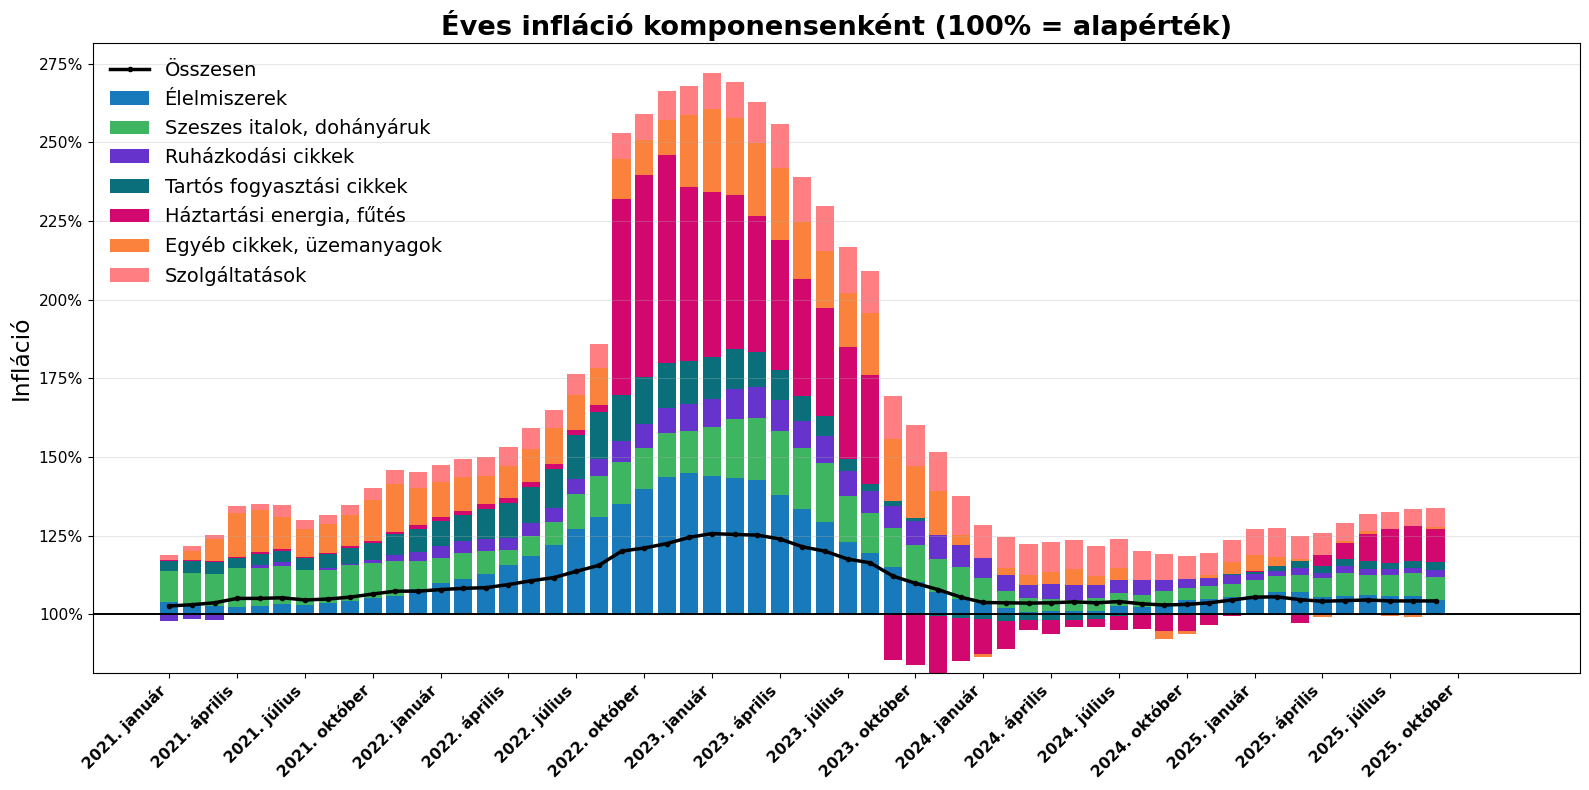

In [ ]:
# Your code here

### Questions to Class 2: Interpreting the Data

Look at the visualization you just created and think about:

1. What happened with energy prices? (Look at "Háztartási energia, fűtés")
2. How does this relate to the Ukraine war and the energy crisis?
3. Why does energy go negative in 2023?
4. Why is the "Összesen" (total) line lower than the sum of the stacked bars?


### Questions to Class 3: Inflation Target

1. What inflation rate is the Magyar Nemzeti Bank (MNB) targeting?
2. Look it up on the [MNB's website](https://www.mnb.hu/en/monetary-policy/monetary-policy-framework/inflation-targeting)
3. When was this target set?
4. Is this a point target or does it have a tolerance band?


### Exercise 6: Year-over-Year Inflation Trend

1. Create a line plot showing year-over-year inflation trend
2. Plot only the total inflation
3. Add the MNB's inflation target (3%) and tolerance band (±1%)
4. Use the color #D3086F for the target visualization
5. Make it professional with proper styling
6. Save the plot to plots/

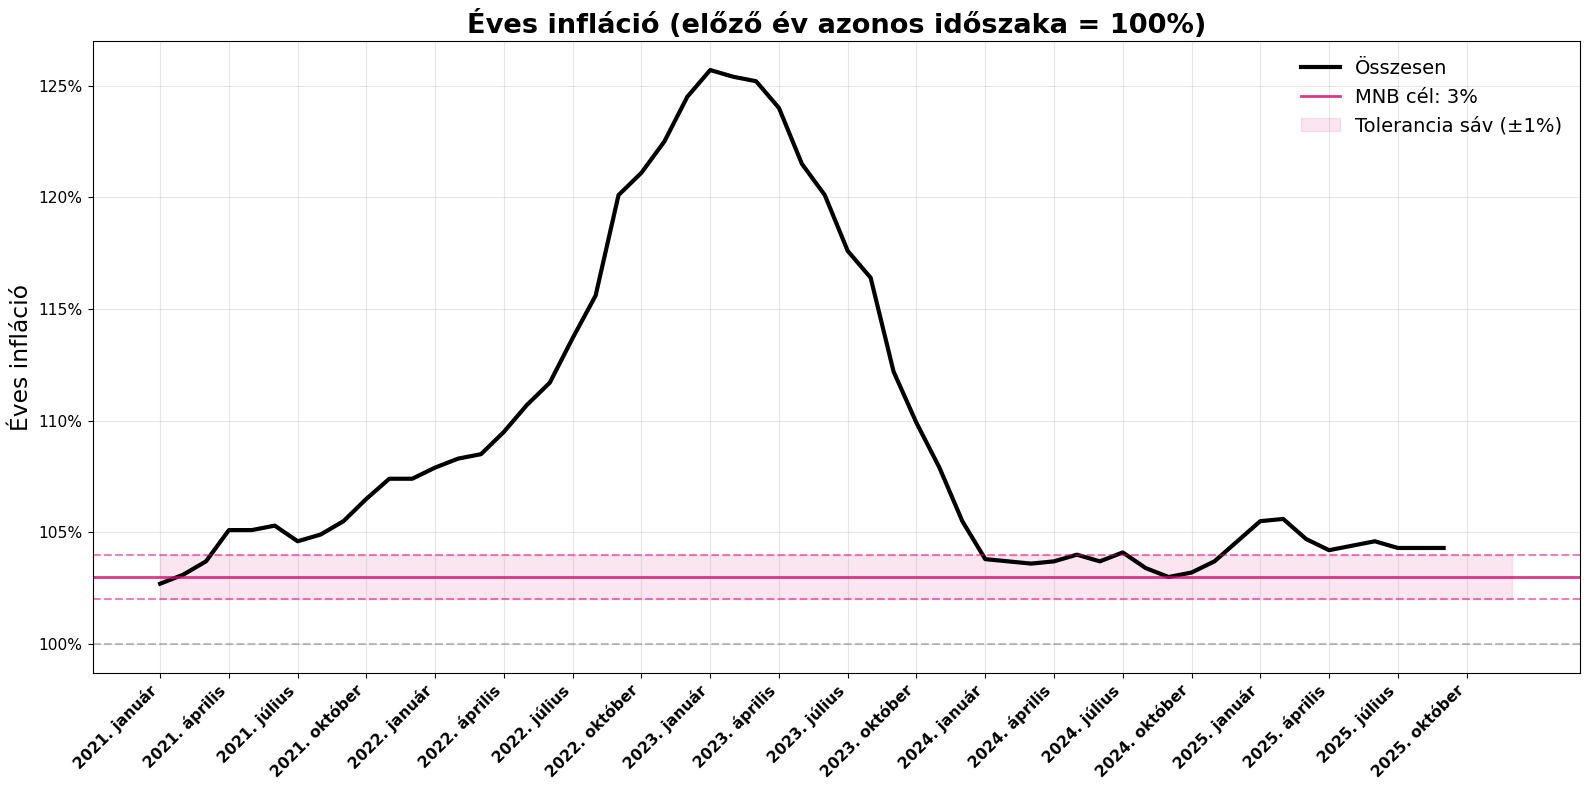

In [ ]:
# Your code here


### Questions to Class 4: Policy Evaluation

Look at the plot showing actual inflation vs. the MNB target:

1. How well did the MNB do in meeting their inflation target?
2. During which periods was inflation significantly outside the target band?
3. If you were **Matolcsy György** (MNB Governor), what monetary policy tools would you use to fight inflation?
4. If you were **Varga Mihály** (Minister of Finance), what fiscal policy measures would you propose?

**Bonus:** Watch [this video about inflation](https://www.youtube.com/watch?v=digiZ-bQz_c) for additional perspective


### Exercise 7: MNB Base Rate Data

1. Find the MNB's base rate (alapkamat) data on their website
2. Download it as an Excel file (.xlsx)
3. Save it to the `data/` folder as `alapkamat.xlsx`
4. Load the Excel file using pandas
5. Examine the data structure
6. Clean the data: parse dates and remove % from rates

In [ ]:
# Your code here

,date,rate
0,2024-09-25,6.50
1,2024-07-24,6.75
2,2024-06-19,7.00
3,2024-05-22,7.25
4,2024-04-24,7.75
...,...,...
148,1993-09-27,22.00
149,1993-05-03,19.00
150,1993-01-01,20.00
151,1992-10-15,21.00


### Exercise 8: Standardize KSH Dates

1. Convert Hungarian month names to numbers (január → 01, február → 02, etc.)
2. Create a new `date` column with yyyy-mm-dd format
3. Set day = 01 for each month
4. This will allow matching with MNB date format


In [ ]:
# Your code here


### Exercise 9: Align Base Rate with Monthly Data

1. Take the rate data you loaded and cleaned in Exercise 7
2. Sort by date (oldest first)
3. Use `pd.merge_asof` to align rates with monthly dates
4. This handles "as of" data correctly - each rate applies from its effective date forward


In [ ]:
# Your code here


,date,rate
0,2021-01-01,0.60
1,2021-02-01,0.60
2,2021-03-01,0.60
3,2021-04-01,0.60
4,2021-05-01,0.60
5,2021-06-01,0.60
6,2021-07-01,0.90
7,2021-08-01,1.20
8,2021-09-01,1.50
9,2021-10-01,1.65


### Exercise 10: Dual-Axis Plot - Inflation vs Base Rate

1. Merge your inflation and base rate dataframes on the date column
2. Create a dual-axis plot:
   - Left axis: month-over-month inflation (%)
   - Right axis: MNB base rate (%)  
   - Shared x-axis: time (dates)
3. Use different colors for each axis (black for inflation, pink for rate)
4. Add a combined legend
5. Make it visually professional
6. Add the start of the Ukrainian War (24 February 2022) as a vertical line

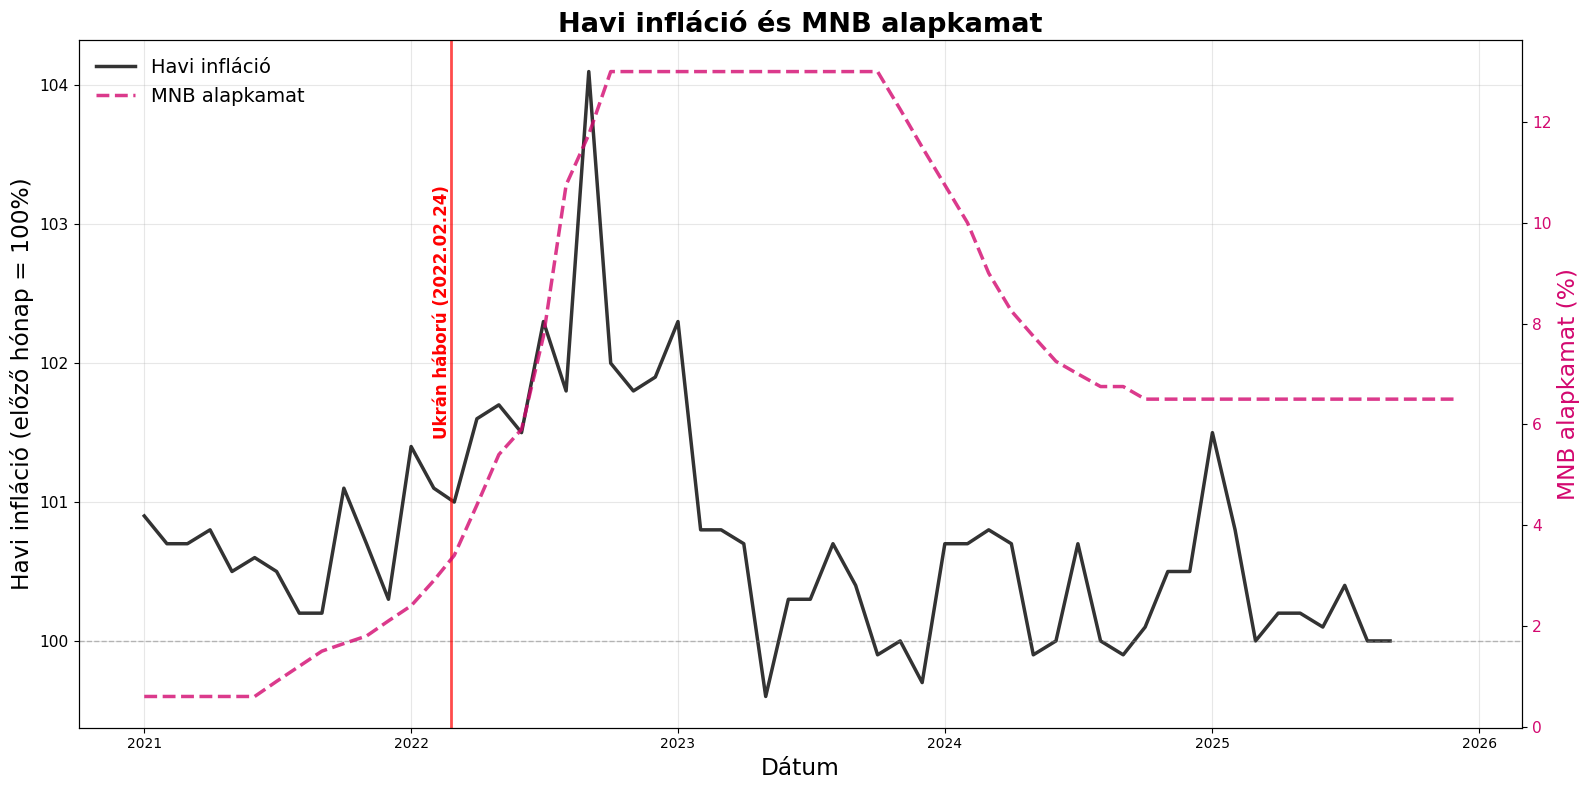

In [ ]:
# Your code here


### Questions to Class 5: Policy Response Speed

Look at the dual-axis plot showing inflation and the MNB base rate:

1. How quickly did the MNB respond to rising inflation with interest rate changes?
2. Was there a lag between inflation spikes and rate adjustments?
3. When inflation started falling in 2023, how quickly did they lower rates?
4. Do you think the policy response was fast enough? Too fast? Explain your reasoning.
